## Module 7 - counterflow diffusion flames

In a diffusion flame, the fuel and oxidizer are separated before combustion. In a counterflow diffusion flame, the fuel moves in the direction opposite to the oxidizer, e.g. fuel flows from left to right and oxidizer from right to left. 'In the middle' the two streams meet and the streams are deflected upward and downwards. 
This type of flame is dominated by diffusion. We will set up a methane-air counterflow diffusion flame.

In [1]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Input parameters
p = ct.one_atm # pressure
tin_f = 300.0  # fuel inlet temperature
tin_o = 300.0  # oxidizer inlet temperature

# Define the gas-mixture and kinetics
# In this case, we are choosing a GRI3.0 gas (methane-air)
gas = ct.Solution('gri30.cti', 'gri30_mix')
gas.TP = gas.T, p

In [3]:
# Define a domain width of 5 cm
width = 0.05

# Mass flux 
mdot_o = 0.1  # kg/m^2/s
mdot_f = 0.1  # kg/m^2/s

# Create the flame object
flame = ct.CounterflowDiffusionFlame(gas, width=width)

flame.fuel_inlet.X = 'CH4:1'
flame.fuel_inlet.T = tin_f
flame.fuel_inlet.mdot = mdot_f

flame.oxidizer_inlet.X = 'O2:1, N2:3.76'
flame.oxidizer_inlet.T = tin_o
flame.oxidizer_inlet.mdot = mdot_o

# Set the boundary emissivities to zero (no radiation)
flame.set_boundary_emissivities(0.0, 0.0)
# Turn radiation off
flame.radiation_enabled = False

flame.set_refine_criteria(ratio=4, slope=0.2, curve=0.3, prune=0.04)

loglevel = 1  # amount of diagnostic output (0 to 5)

# Solve the problem
flame.solve(loglevel, auto=True)

print("Done!")


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     8.009e-06      6.219
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002053      5.242
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.003507      4.123
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.002959      3.656
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.004994      4.059
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.00474      3.767
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.0135      3.502
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.

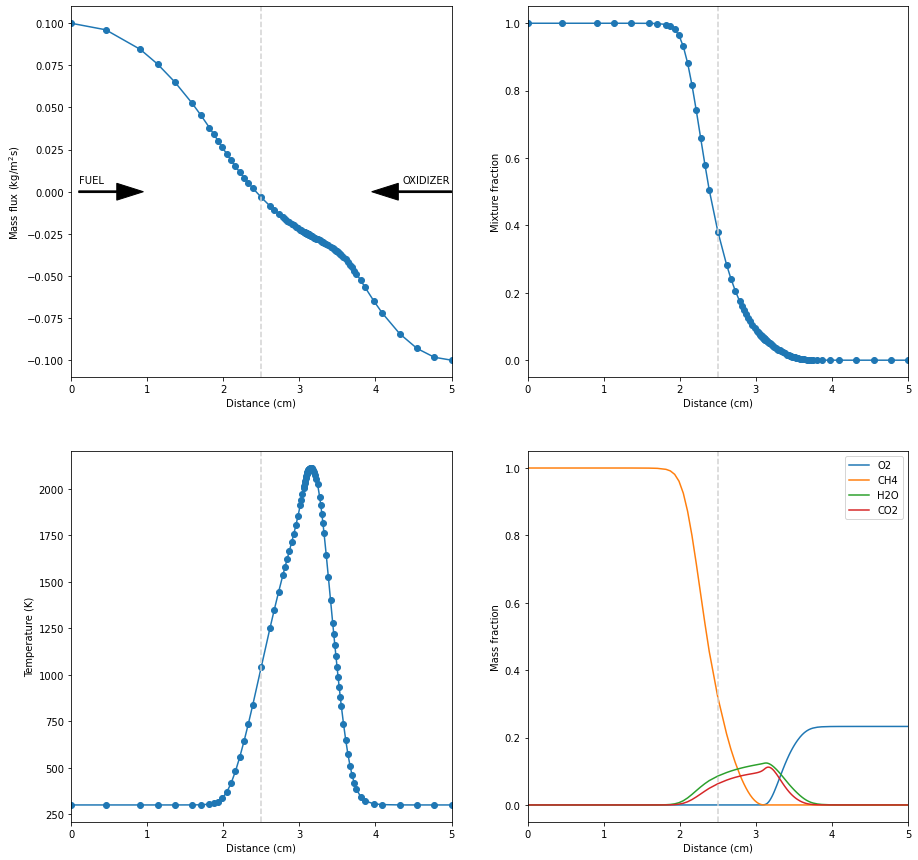

In [4]:
fig = plt.figure(figsize=(15,15))

# we create a plot with 2 rows and 2 columns
axs = fig.subplots(2, 2)

# mass flux
axs[0, 0].plot(flame.grid*100, flame.u * flame.density, '-o')
axs[0, 0].set_xlim(flame.grid[0], flame.grid[-1]*100)
axs[0, 0].set_xlabel('Distance (cm)')
axs[0, 0].set_ylabel('Mass flux (kg/m$^2$s)')
axs[0, 0].axvline(x=2.5, color='lightgrey',ls='--')
axs[0, 0].arrow(0.1, 0, 0.5, 0.0, head_width=0.01, head_length=0.35, fc='k', ec='k')
axs[0, 0].text(0.1,0.005,'FUEL')
axs[0, 0].arrow(5.0, 0, -0.7, 0.0, head_width=0.01, head_length=0.35, fc='k', ec='k')
axs[0, 0].text(4.35,0.005,'OXIDIZER')


# mixture fraction
axs[0, 1].plot(flame.grid*100, flame.mixture_fraction('C'), '-o')
axs[0, 1].set_xlim(flame.grid[0], flame.grid[-1]*100)
axs[0, 1].set_xlabel('Distance (cm)')
axs[0, 1].set_ylabel('Mixture fraction')
axs[0, 1].axvline(x=2.5, color='lightgrey',ls='--')


# temperature
axs[1, 0].plot(flame.grid*100, flame.T, '-o')
axs[1, 0].set_xlim(flame.grid[0], flame.grid[-1]*100)
axs[1, 0].set_xlabel('Distance (cm)')
axs[1, 0].set_ylabel('Temperature (K)')
axs[1, 0].axvline(x=2.5, color='lightgrey',ls='--')

# mass fractions of main species
axs[1, 1].plot(flame.grid*100, flame.Y[3], label='O2')
axs[1, 1].plot(flame.grid*100, flame.Y[13], label='CH4')
axs[1, 1].plot(flame.grid*100, flame.Y[5], label='H2O')
axs[1, 1].plot(flame.grid*100, flame.Y[15], label='CO2')
axs[1, 1].set_xlim(flame.grid[0], flame.grid[-1]*100)
axs[1, 1].set_xlabel('Distance (cm)')
axs[1, 1].set_ylabel('Mass fraction')
axs[1, 1].axvline(x=2.5, color='lightgrey',ls='--')

axs[1, 1].legend()
plt.show()

The top left figure above shows the mass flow rate of the fuel and air in the counterflow flame. The figure is clearly asymmetric. In the bottom left figure we see that the temperature peak is shifted towards the side of the oxidizer. The flame is located at the position where the mixture fraction is stoichiometric. In the right top and bottom figures we also see that the region where fuel and oxidizer concentrations are changing is large compared to premixed flames under comparable conditions.

An important variable in diffusion flames is the mixture fraction $Z$: $Z=1$ in the fuel stream and $Z=0$ in the air stream. The mixture fraction in a diffusion flame is similar to the progress variable in a premixed flame. The mixture fraction can be defined using the elemental mass fraction of a component of the fuel, e.g. carbon or hydrogen. We can plot the temperature and concentrations as a function of the mixture fraction: 

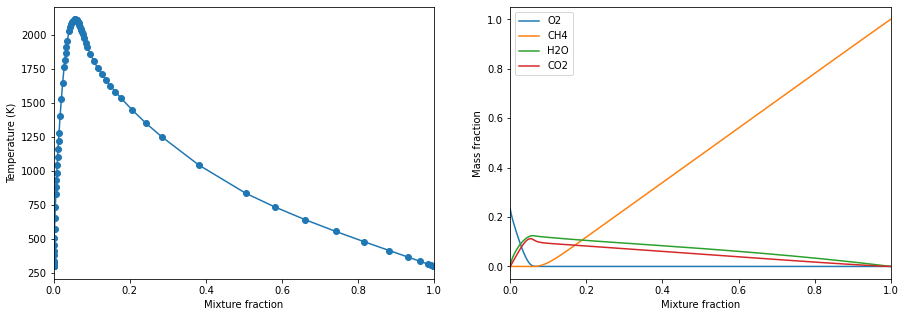

In [5]:
fig = plt.figure(figsize=(15,5))

# we create a plot with 2 rows and 2 columns
axs = fig.subplots(1, 2)

# temperature as function of mixture fraction
axs[0].plot(flame.mixture_fraction('C'), flame.T, '-o')
axs[0].set_xlim(0, 1)
axs[0].set_xlabel('Mixture fraction')
axs[0].set_ylabel('Temperature (K)')

# mass fractions as function of mixture fraction
axs[1].plot(flame.mixture_fraction('C'), flame.Y[3], label='O2')
axs[1].plot(flame.mixture_fraction('C'), flame.Y[13], label='CH4')
axs[1].plot(flame.mixture_fraction('C'), flame.Y[5], label='H2O')
axs[1].plot(flame.mixture_fraction('C'), flame.Y[15], label='CO2')
axs[1].set_xlim(0, 1)
axs[1].set_xlabel('Mixture fraction')
axs[1].set_ylabel('Mass fraction')
axs[1].legend()

plt.show()

In [7]:
# stoichiometric mixture fraction 
YF0 = 1
YO0 = 1/4.76
Z_st = 1/(4*(YF0/YO0)+1)
print(Z_st)

0.0499001996007984


An important parameter in diffusion flames is the strain rate $a=\frac{du}{dx}$. Strain will reduce the reaction rate. A very high strain can even quench a flame. This happens when you blow out a candle. The (mean) strain rate is available in the `flame` object:

In [6]:
print("{:5.2f} {:5.2f} {:5.0f}".format(mdot_o, flame.strain_rate('mean'), np.max(flame.T)))

 0.10  4.78  2112


If the mass flow rate increases, the strain rate will increase. This will lower the flame temperature. For a high enough mass flow rate, the strain rate will be so high that the flame will be quenched. This behavior can be reproduced with Cantera. We can increase the mass flow rate in steps until the maximum temperature is lower than $T=500$. From literature we know that the maximum strain of a counterflow diffusion flame of methane and air is somewhere between 100 $1/s$ and 1000 $1/s$. In Cantera, the smallest mass flow rate that can be used before you run into numerical issues (with the setup above) is $\dot m = 0.012$ $kg/m^2s$

## Assignment 7 (9 points, grade = 1 + points)
Create a new notebook for this assignment and compute 3 counterflow flames for methane-air as above but with the following mass flow rates: 
 - flame 1: $\dot m_O=0.4060$ and $\dot m_F=0.1000$, 
 - flame 2: $\dot m_O=0.1000$ and $\dot m_F=0.2700$, 
 - flame 3: $\dot m_O=0.2095$ and $\dot m_F=0.2095$
 
1. plot the mass flux, mixture fraction and temperature for these three flames **together** in a single 3-column subplot figure. So you will have three figures next to each other, each containing 3 counterflow flame results. Add legends for clarity. 
2. Comment on the effect of the mass flow rate on the location of the flame.
3. For the same 3 counterflow flames, create a 3-column subplot figure showing (1) the temperature as a function of the mixture fraction, (2) the major species mass fractions $Y_{CH4}$,$Y_{O2}$,$Y_{H2O}$ and $Y_{CO2}$ and (3) the minor species $Y_{CO}$, $Y_{OH}$, $Y_{H2}$ and $Y_{NO}$. Use a logarithmic y-axis.
4. Compute the stoichiometric mixture fraction $Z_{st}$ from theory, add the location to the species plot as a dashed vertical line and add the value $Z_st$ next to the line in the plot. Determine the strain rate $a$ for each of the flames (give a list) and comment on the results $T(x)$ and $T(Z)$; why do the temperature plots $T(Z)$ all look like that?
5. In a *while* loop, start with a mass flow rate of 0.03 for the fuel and air, and increase the strain rate $a$ every iteration by increasing the mass flow rate for the fuel and air by 50%. Store all flame results in a large array(see your previous notebooks on how to do this). Terminate the loop when the maximum temperature drops below 500K, because then the flame has quenched. Plot $\dot m(x)$ for all flames in a single plot. Comment on the relation between strain rate and mass flow rate. What is a lower and upper limit for the quenching strain rate $a_q$?
6. Plot the temperature as function of mixture fraction $T(Z)$ for all flames in a single plot. Indicate in the figure with arrows/lines/text where the limit for chemical equilibrium and the limit for flame quenching is and what the values for strain are at these locations. Comment on the relation between strain rate and temperature. 
7. Plot in a 3-column subplot figure the mass fraction of (1) $Y_{OH}(Z)$, (2) $Y_{CO}(Z)$ and $Y_{NO}(Z)$. Comment on the relation between strain rate and emissions.
8. plot in a 2x1 subplot $T_{max}(a)$ and $Y_{OH_{max}}(a)$. Use a logarithmic scale for the strain rate. 
9. Leakage is the process of either a fuel diffusing into the oxidizer stream or vice versa. Investigate if leakage of fuel or oxygen occurs, use the flame results from your lowest and highest strain rates that you have computed to support your claim.